In [41]:
import os
from dotenv import load_dotenv
from settrade_v2 import Investor
import matplotlib.pyplot as plt
import pandas as pd
from mpl_finance import candlestick_ohlc 
import matplotlib.dates as mpl_dates 

load_dotenv()

investor = Investor(    
    app_id=os.getenv('app_id'),    
    app_secret=os.getenv('app_secret'),
    broker_id=os.getenv('broker_id'),
    app_code=os.getenv('app_code'),
    is_auto_queue = False
)

1. Get Market History Data

In [20]:
market = investor.MarketData()

In [55]:
res = market.get_candlestick(symbol="TISCO", interval="1d", limit=2, normalized=True)

In [56]:
stock_prices = pd.DataFrame(res)

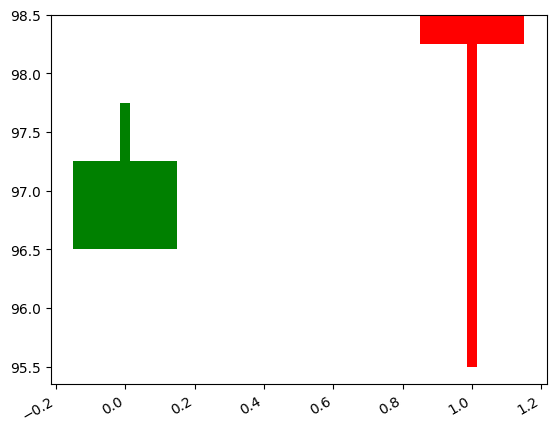

In [58]:
plt.figure() 
  
# "up" dataframe will store the stock_prices  
# when the closing stock price is greater 
# than or equal to the opening stock prices 
up = stock_prices[stock_prices.close >= stock_prices.open] 
  
# "down" dataframe will store the stock_prices 
# when the closing stock price is 
# lesser than the opening stock prices 
down = stock_prices[stock_prices.close < stock_prices.open] 
  
# When the stock prices have decreased, then it 
# will be represented by red color candlestick 
col1 = 'red'
  
# When the stock prices have increased, then it  
# will be represented by green color candlestick 
col2 = 'green'
  
# Setting width of candlestick elements 
width = .3
width2 = .03
  
# Plotting up prices of the stock 
plt.bar(up.index, up.close-up.open, width, bottom=up.open, color=col1) 
plt.bar(up.index, up.high-up.close, width2, bottom=up.close, color=col1) 
plt.bar(up.index, up.low-up.open, width2, bottom=up.open, color=col1) 
  
# Plotting down prices of the stock 
plt.bar(down.index, down.close-down.open, width, bottom=down.open, color=col2) 
plt.bar(down.index, down.high-down.open, width2, bottom=down.open, color=col2) 
plt.bar(down.index, down.low-down.close, width2, bottom=down.close, color=col2) 
  
# rotating the x-axis tick labels at 30degree  
# towards right 
plt.xticks(rotation=30, ha='right') 
  
# displaying candlestick chart of stock data  
# of a week 
plt.show() 